# Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
datapath = r'/content/drive/MyDrive/Group05/Regression/UnivariateData/5.csv'

In [ ]:
dataset = np.loadtxt(datapath,delimiter=",")
dataset.shape

(1001, 2)

In [ ]:
def plot(data):  
  x , y = data[:,0] , data[:,1]
  plt.scatter(x, y, color='b',edgecolors='black')  
  plt.title("Univariate Dataset")
  plt.xlabel("input axis")
  plt.ylabel("output axis")
  # plt.savefig("/content/drive/MyDrive/Group05/results/1D.png")

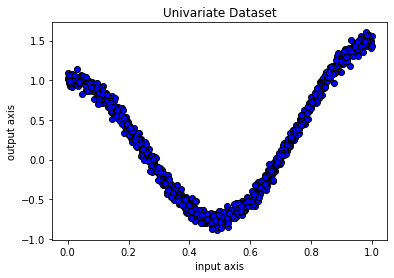

In [ ]:
plot(dataset)

## Train Valid Test Split (60%-20%-20%)

In [ ]:
def train_test_split(data):
  row, col = data.shape
  n = int(0.6*row)
  train = data[:n]
  validation=data[n:int(0.8*row)]
  test = data[int(0.8*row):row]
  return train,validation,test

In [ ]:
train_data, valid_data, test_data = train_test_split(dataset)


# MLFCNN Training Model

In [ ]:
def sigmoid_af(x):
  s = 1/(1+np.exp(-(x)))
  return s

In [ ]:
np.random.seed(0)
def model_train(train_data,nodes):
  N, d = train_data.shape
  wh = 0.10*np.random.randn(2, nodes+1)
  wo = 0.10*np.random.randn(nodes+1, 1)
  epochs=250
  avg_err = []
  mse=[]
  epoch=0
  while(epochs):
    
        err = []        
        for i in range(N):
            y_op = train_data[i,1]

            xi = [1, train_data[i,0]] #Input layer
            #--------------------------
            a = np.dot(wh.T, xi) #hidden layer 1 out
            h = sigmoid_af(a) #hidden layer 1 activation out
            
            # a1=np.insert(h1,0,1)
            #--------------------------
            out = np.dot(wo.T, h) #Output layer out
            y_pred = out #Linear Output activation 
            #--------------------------
            
            en = sum(0.5*(y_op-y_pred)**2)
            err.append(en)
            
            neta = 0.05
            
            #Update weights
            wo = wo + (neta * np.outer(h, (y_op-y_pred)))
            
            var1 = np.dot(wo, (y_op-y_pred))
            var2 = h * (1-h)
            
            wh = wh + (neta * np.outer(xi, var1*var2))

            
        avg_error = sum(err)/len(err)
        avg_err.append(avg_error)
        epoch+=1
        if epochs%1==0:
            print("Average Error at Epoch ",epoch," ",avg_error)
        epochs -= 1
        mse.append(np.sqrt(sum(err)/len(err)))
    
  return wh, wo, avg_err, h, y_pred, mse




In [ ]:
wh, wo, avg_err, h1_out, output, mse = model_train(train_data,4)

Average Error at Epoch  1   0.2725027769986179
Average Error at Epoch  2   0.2729077817007856
Average Error at Epoch  3   0.27348947408274343
Average Error at Epoch  4   0.274086810758835
Average Error at Epoch  5   0.27469101988445077
Average Error at Epoch  6   0.2752957037730986
Average Error at Epoch  7   0.2758952022058098
Average Error at Epoch  8   0.2764837779937039
Average Error at Epoch  9   0.27705575941486177
Average Error at Epoch  10   0.27760607128240883
Average Error at Epoch  11   0.2781306194975626
Average Error at Epoch  12   0.27862635562219906
Average Error at Epoch  13   0.2790911068765084
Average Error at Epoch  14   0.2795233190308059
Average Error at Epoch  15   0.2799218149001311
Average Error at Epoch  16   0.2802856102296786
Average Error at Epoch  17   0.2806137895332331
Average Error at Epoch  18   0.28090542882505704
Average Error at Epoch  19   0.2811595505085991
Average Error at Epoch  20   0.281375099230483
Average Error at Epoch  21   0.28155093144626

# Testing

In [ ]:

def test_model(test_data, wh,wo):
    N=len(test_data)
    a1_list=[]
    ao_list=[]
    y_pred_list = []
    err=[]
    for i in range(N):
        y_true = test_data[i, 1]
        op=sigmoid_af(np.dot(wh.T, [1, test_data[i, 0]]))
        a1_list.append(op)
        y_pred = np.dot(wo.T, op)  
        ao_list.append(y_pred)      
        e = (y_true-y_pred)**2
        
        y_pred_list.append(y_pred)
        err.append(e)
    mse=sum(err)/len(err)
    
    return y_pred_list,mse,ao_list,a1_list

y_pred_ts, msets,aols_ts,a1ls_ts = test_model(test_data, wh,wo)
y_pred_tr, msetr,aols_tr,a1ls_tr = test_model(train_data, wh,wo)
y_pred_vd, msevd,aols_vd,a1ls_vd = test_model(valid_data, wh,wo)
y_pred_all, mse_all,aols_all,a1ls_all = test_model(dataset, wh,wo)

# Results

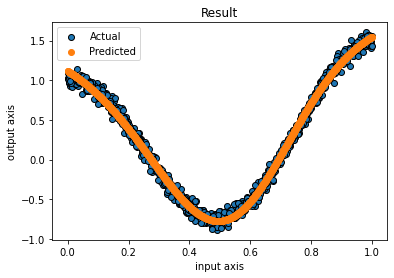

In [ ]:
plt.scatter(dataset[:,0], dataset[:,1],edgecolors="black")
plt.scatter(dataset[:,0], y_pred_all)
plt.title("Result")
plt.xlabel("input axis")
plt.legend(["Actual","Predicted"])
plt.ylabel("output axis")
plt.savefig("/content/drive/MyDrive/Group05/results/regress_result.png")
plt.show()

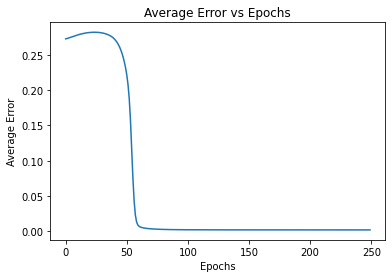

In [ ]:
plt.plot(avg_err)
plt.title("Average Error vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Average Error")
plt.savefig("/content/drive/MyDrive/Group05/results/1Derrorvsepoch.png")
plt.show()

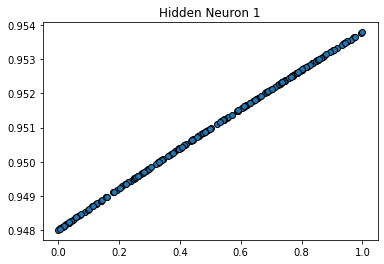

In [ ]:
y_pred_ts, msets,final_outputs, hidden_outputs = test_model(test_data, wh,wo)
y_pred_vd, msevd,final_outputs, hidden_outputs = test_model(test_data, wh,wo)
# y_pred, final_outputs, hidden_outputs, error = prediction(test1)
hidden_outputs = np.array(hidden_outputs)
final_outputs = np.array(final_outputs)

hidden=pd.DataFrame(hidden_outputs, columns=['node1', 'node2', 'node3', 'node4','node5'])
node1 = hidden['node1']

plt.scatter(test_data[:,0], node1, cmap='Greens', edgecolors='black')
plt.title("Hidden Neuron 1")
plt.show()

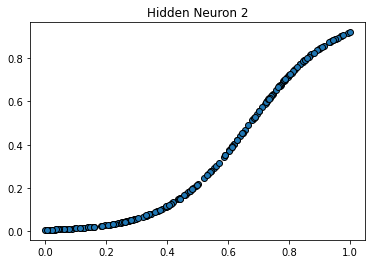

In [ ]:
node2 = hidden['node2']

plt.scatter(test_data[:,0], node2, cmap='Green', edgecolors='black')
plt.title("Hidden Neuron 2")
plt.show()

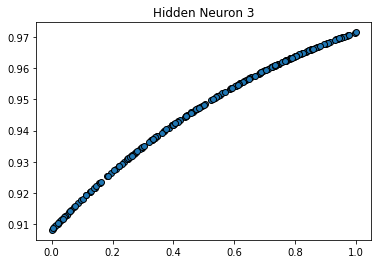

In [ ]:
node3 = hidden['node3']

plt.scatter(test_data[:,0], node3, cmap='Green', edgecolors='black')
plt.title("Hidden Neuron 3")
plt.show()

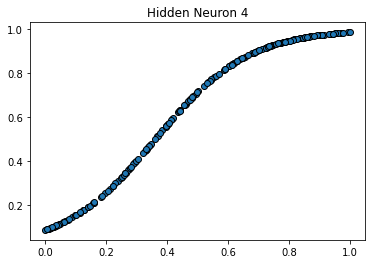

In [ ]:
node4 = hidden['node4']

plt.scatter(test_data[:,0], node4, cmap='Green', edgecolors='black')
plt.title("Hidden Neuron 4")
plt.show()

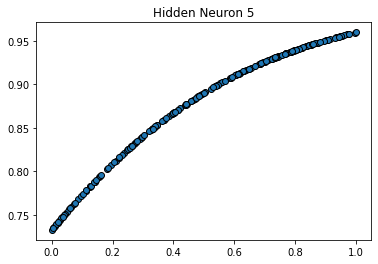

In [ ]:
node5 = hidden['node5']

plt.scatter(test_data[:,0], node5, cmap='Green', edgecolors='black')
plt.title("Hidden Neuron 5")
plt.show()

# Mean Sqaured Error

<ipython-input-146-feccca07d2c0>:2: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  y=[np.asscalar(msetr),np.asscalar(msets),np.asscalar(msevd)]


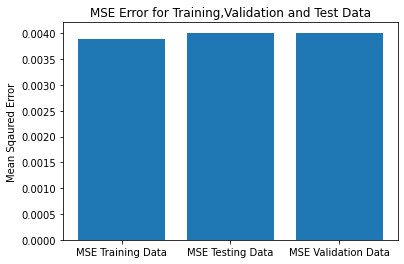

In [ ]:
x=["MSE Training Data","MSE Testing Data","MSE Validation Data"]
y=[np.asscalar(msetr),np.asscalar(msets),np.asscalar(msevd)]

plt.bar(x,y)

plt.title("MSE Error for Training,Validation and Test Data")
plt.ylabel("Mean Sqaured Error")
# plt.savefig("/content/drive/MyDrive/Group05/results/mse1D.png")
plt.show()

# Model vs Target Output (Training Data)

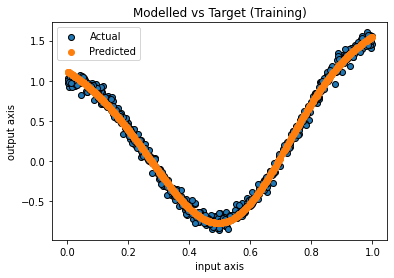

In [ ]:
plt.scatter(train_data[:,0], train_data[:,1],edgecolor='black')
plt.scatter(train_data[:,0],y_pred_tr)
plt.title("Modelled vs Target (Training)")
plt.legend(["Actual","Predicted"])
plt.xlabel("input axis")
plt.ylabel("output axis")
plt.savefig("/content/drive/MyDrive/Group05/results/training_result.png")
plt.show()

# Model vs Target Output (Validation Data)

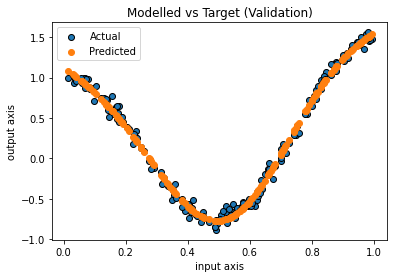

In [ ]:
plt.scatter(valid_data[:,0], valid_data[:,1],edgecolor='black')
plt.scatter(valid_data[:,0],y_pred_vd)
plt.title("Modelled vs Target (Validation)")
plt.legend(["Actual","Predicted"])
plt.xlabel("input axis")
plt.ylabel("output axis")
plt.savefig("/content/drive/MyDrive/Group05/results/training_result.png")
plt.show()

# Model vs Target Output (Test Data)

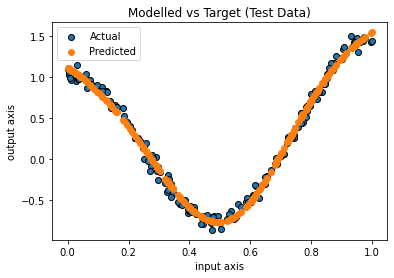

In [ ]:
plt.scatter(test_data[:,0], test_data[:,1],edgecolors="black")
plt.scatter(test_data[:,0], y_pred_ts)
plt.title("Modelled vs Target (Test Data)")
plt.legend(["Actual","Predicted"])
plt.xlabel("input axis")
plt.ylabel("output axis")
plt.savefig("/content/drive/MyDrive/Group05/results/test_result.png")
plt.show()

# Model vs Target Output (Training Data)

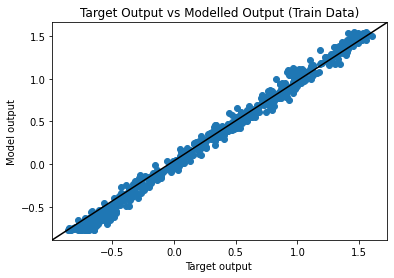

In [ ]:
fig, ax = plt.subplots()
plt.scatter( train_data[:,1],y_pred_tr)
ax.plot([0,1],[0,1], transform=ax.transAxes,color="black")
plt.title("Target Output vs Modelled Output (Train Data)")
plt.xlabel("Target output ")
plt.ylabel("Model output")
plt.savefig("/content/drive/MyDrive/Group05/results/4Univarate_train.png")
plt.show()

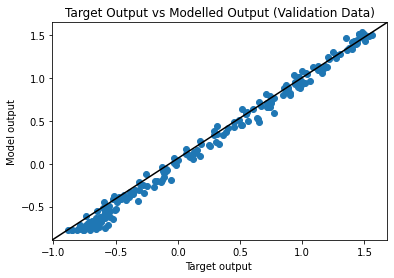

In [ ]:
fig, ax = plt.subplots()
plt.scatter(valid_data[:,1],y_pred_vd)
ax.plot([0,1],[0,1], transform=ax.transAxes,color="black")
plt.title("Target Output vs Modelled Output (Validation Data)")
plt.xlabel("Target output ")
plt.ylabel("Model output")
plt.savefig("/content/drive/MyDrive/Group05/results/4Univarate_test.png")
plt.show()

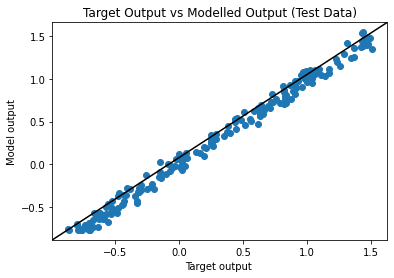

In [ ]:
fig, ax = plt.subplots()
plt.scatter(test_data[:,1],y_pred_ts)
ax.plot([0,1],[0,1], transform=ax.transAxes,color="black")
plt.title("Target Output vs Modelled Output (Test Data)")
plt.xlabel("Target output ")
plt.ylabel("Model output")
plt.savefig("/content/drive/MyDrive/Group05/results/4Univarate_test.png")
plt.show()